# Machine Learning


# Home Assignment 4


### О задании

Практическое задание 4 посвящено ансамблям, bias-variance decomposition, деревьям и нейронным сетям. Обучение нейронных сетей займет какое-то время, поэтому не оставляйте эту часть на последний день!


### I. Разложение ошибки на смещение и разброс
#### Теоретическое вступление
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar x} f(\bar x)$ функции от многомерной случайной величины $\bar x = (x_1, \dots, x_d)$, $\bar x \sim p(\bar x)$, можно сгенерировать выборку из распределения $p(\bar x)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar x} f(x) = \int f(\bar x) p(\bar x) d \bar x \approx \frac 1 m \sum_{i=1}^m f(\bar x_i), \, \bar x_i \sim p(\bar x), i = 1, \dots, m.$$

Для оценки многомерных интегралов ($d > 1$) объекты лучше генерировать, следуя специальным схемам, чтобы адекватно оценивать значение интеграла в областях высокой плотности. Мы не будем так усложнять задачу, а просто будем генерировать $\bar x_i$ независимо.

In [1]:
import numpy as np

Например, оценим $\mathbb{E}_x x^2,$ $x \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_x x^2 = \sigma^2 + \mu^2 = 34$):

In [2]:
x = np.random.normal(loc=5, scale=3, size=1000)
(x**2).mean()

32.572780995346804

Или посчитаем многомерный интеграл $\mathbb{E}_{\bar x} \bar x^T \bar x = \mathbb{E}_{\bar x} \sum_{i=1}^d x_i^2$, $\bar x \sim \mathcal{N}(\bar \mu=(1, \dots, 1), \Sigma=I)$ при $d = 10$ (аналитический ответ 20):

In [3]:
d = 10
X = np.random.multivariate_normal(np.ones(10), np.eye(10), size=1000)
(X**2).sum(axis=1).mean()

20.019762553761197

Чтобы оценить интеграл по выборке, можно сгенерировать несколько выборок, вычислить на них значение функции и усреднить. Например, для интеграла $\mathbb{E}_X [\mu(X)(x)]$ генерируются выборки $X_1, \dots, X_m$, на каждой из них обучается алгоритм $\mu$ и делается предсказание для объекта $x$.

#### Практическая часть
#####  Построение "среднего" алгоритма $\mathbb{E}_X [\mu(X)]$
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм $\mathbb{E}_X [\mu(X)]$ аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1 (0.6 балла)__
1. Сгенерируйте выборку x из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных y как сумму f(x) и случайного шума, сгенерированного из равномерного распределения на отрезке [-1, 1] (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: f(x) и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

In [7]:
from sklearn.tree import DecisionTreeRegressor

X_train = np.random.exponential(size = sample_size)
y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

treeReg = DecisionTreeRegressor()
treeReg.fit(X_train[:, np.newaxis], y_train)
y = treeReg.predict(linspace[:, np.newaxis])

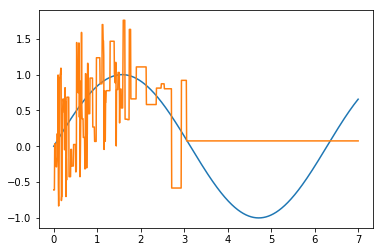

In [8]:
plt.plot(linspace, f(linspace))
plt.plot(linspace, y)

__2 (0.6 балла):__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

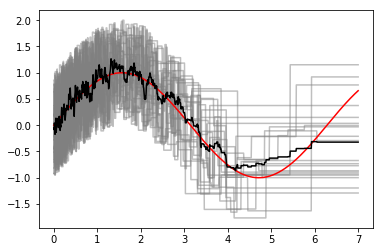

In [11]:
predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size = sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    treeReg = DecisionTreeRegressor()
    treeReg.fit(X_train[:, np.newaxis], y_train)
    y = treeReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace), color = "red")
plt.plot(linspace, sum(predictions) / samples_num, color = "black")


__3 (0.2 балла):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

При глубине дерева 2:

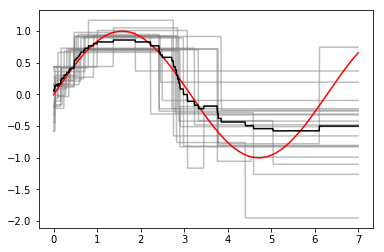

In [12]:
predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size = sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    treeReg = DecisionTreeRegressor(max_depth = 2)
    treeReg.fit(X_train[:, np.newaxis], y_train)
    y = treeReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace), color = "red")
plt.plot(linspace, sum(predictions) / samples_num, color = "black")


При глубине дерева 4:

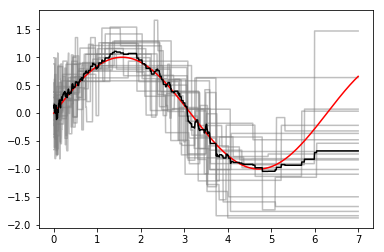

In [13]:
predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size=sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    treeReg = DecisionTreeRegressor(max_depth = 4)
    treeReg.fit(X_train[:, np.newaxis], y_train)
    y = treeReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace), color = "red")
plt.plot(linspace, sum(predictions) / samples_num, color="black")


__4 (0.6 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

Смещение уменьшается при увеличении глубины дерева. При ограничении 4 и без ограничения вообще смещение близко к нулю. Похоже, что после 4 дальнейшее увеличение глубины не дает уменьшения смещения.

__5 (1 балл)__
Проделайте тот же эксперимент с линейной регрессией и SVM с rbf ядром и параматрами $\gamma = 1$, $\gamma = 100$. Какие выводы можно сделать?

Линейная регрессия:

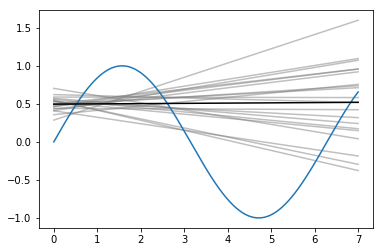

In [15]:
from sklearn.linear_model import LinearRegression

predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size = sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    linReg = LinearRegression()
    linReg.fit(X_train[:, np.newaxis], y_train)
    y = linReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace))
plt.plot(linspace, sum(predictions) / samples_num, color = "black")

Rbf ядро, $\gamma = 100$:

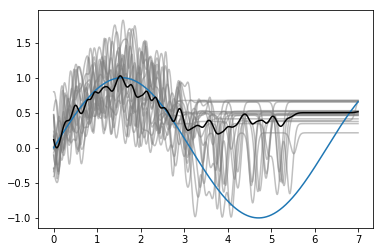

In [28]:
from sklearn.svm import SVR

predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size = sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    linReg = SVR(kernel = 'rbf',gamma = 100)
    linReg.fit(X_train[:, np.newaxis], y_train)
    y = linReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace))
plt.plot(linspace, sum(predictions) / samples_num, color = "black")

Rbf ядро, $\gamma = 1$:

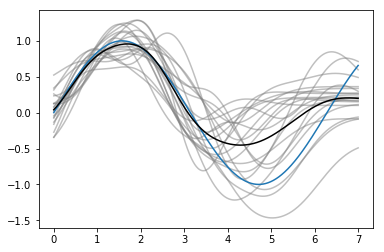

In [29]:
predictions = []
for i in range(samples_num):
    X_train = np.random.exponential(size = sample_size)
    y_train = f(X_train) + np.random.uniform(-1, 1, sample_size)

    linReg = SVR(kernel = 'rbf',gamma = 1)
    linReg.fit(X_train[:, np.newaxis], y_train)
    y = linReg.predict(linspace[:, np.newaxis])

    predictions += [y]
    plt.plot(linspace, y, color = "gray", alpha = 0.5)
    

plt.plot(linspace, f(linspace))
plt.plot(linspace, sum(predictions) / samples_num, color="black")

Линейная регрессия плохо приближает истинную зависимость, причем усреднение ничего не дает, так как в результате все равно получается линейная модель.

SVM справляется гораздо лучше, результат лучше при $\gamma = 1$

### II. Решающие деревья

__5 (1 балл)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassfier, считающий все признаки категориальными
* DecisionTreeClassifier, c корректным разбиением на категориальные и вещественные признаки.

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.

In [19]:
import pandas as pd

X1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)
X2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", header = None)
X3 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header = None)
X4 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header = None)

### III. Композиции деревьев
#### Сравнение композиционных методов над решающими деревьями
__6 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import pandas as pd

algs = [DecisionTreeClassifier(),
       BaggingClassifier(n_estimators = 100),
       BaggingClassifier(n_estimators = 100, max_features = 0.5),
       RandomForestClassifier(n_estimators = 100)]


In [19]:
data = pd.read_csv('winequality-red.csv', sep = ';')

X_train = data.drop('quality', axis = 1)
y_train = data['quality']

In [20]:
for alg in algs:
    print(cross_val_score(alg, X_train, y_train, cv = 3, scoring = 'accuracy'))

[ 0.46168224  0.41838649  0.46892655]
[ 0.50841121  0.5684803   0.56685499]
[ 0.49719626  0.57223265  0.58380414]
[ 0.50280374  0.56472795  0.56308851]


#### Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__7 (1 балл)__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 100, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $100 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

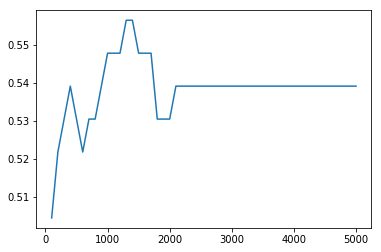

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

rfc = RandomForestClassifier(warm_start = True)
predictions = []
for i in range(100, 5010, 100):
    rfc.set_params(n_estimators = i)
    rfc.fit(X_train, y_train)
    predictions += [accuracy_score(rfc.predict(X_test), y_test)]

plt.plot(range(100, 5010, 100), predictions)


Лес совсем не переобучается, после 2000 деревьев добавление новых не играет никакой роли.

### IV. Нейронные сети

*На обучение нейросетей может уйти больше часа, не откладывайте этот пункт на последний день*.

__8 (1 балл)__

В этом задании вам предстоит обучить нейронную сеть на датасете [MNIST](https://en.wikipedia.org/wiki/MNIST_database) с помощью пакета [keras](https://keras.io).

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
from keras.utils import np_utils
x_train, x_test = x_train.reshape(60000, 784), x_test.reshape(10000, 784)
x_train, x_test = x_train.astype(float)/255, x_test.astype(float)/255
y_train, y_test = np_utils.to_categorical(y_train, 10), np_utils.to_categorical(y_test, 10)

Обучите нейронную сеть с двумя скрытыми слоями в каждой из которых поместите по 100 нейронов. Какого качества удается добиться на тесте?

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()
model.add(Dense(units = 512, input_shape = (784,), activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(x_train, y_train)
model.evaluate(x_test, y_test)[1]

Epoch 1/1
10000/10000 [==============================] - 0s 47us/step


0.96450000000000002

__9 (2 балл)__
Добавьте сверточные и pooling слои (вы можете также убрать Dense слои), добейтесь большего качества. Для успешного выполнения задания получите accuracy больше 0.99 на тестовой выборке. 

Рекомендации: после сверточных слоев наиболее эффективно добавлять MaxPooling слои, в конце перед последним слоем поставьте Dense слои с достаточно большим количеством нейронов. Подвигайте количество слоев, learning rate, функции активации.

In [11]:
from keras.layers import MaxPooling2D, Conv2D

categories = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(60000, 28, 28, 1).astype(float)/255, \
                  X_test.reshape(10000, 28, 28, 1).astype(float)/255

Y_train = np_utils.to_categorical(y_train, categories)
Y_test = np_utils.to_categorical(y_test, categories)

model = Sequential()
model.add(Conv2D(16, (4, 4), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(2000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train)
model.evaluate(X_test, Y_test)

Epoch 1/1
10000/10000 [==============================] - 16s 2ms/step


[0.070496501535479913, 0.98160000000000003]

__10 (1 балл)__
Добавьте 1 или 2 dropout слоя внутрь сети предыдущего шага. Удается ли добиться большего качества? Что происходит с процессом обучения? 

In [12]:
model = Sequential()
model.add(Conv2D(16, (4, 4), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train)
model.evaluate(X_test, Y_test)

Epoch 1/1
10000/10000 [==============================] - 17s 2ms/step


[0.049719492848351365, 0.9849]

Качество немного увеличилось, незначительно увеличилось время обучения.